# Unit 5 | Assignment - The Power of Plots

## Option 1: Pyber

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

## Pyber Observations

####  Breakdown of our Drivers, Rides, and Fares across three City Types: Urban, Suburban, Rural

• In Urban areas we see 68.4pct of our total rides and 62.7pct of our total fares. We can deduce that Urban riders likely have shorter ride times which equal lower total fares. Additionally since 80.9% of our drivers are in Urban areas, we likely have ample driver supply which keeps driver fares low, as our driver supply likely may outweigh rider demand at times. 

• We see higher avergage fares for Rural areas, this is likely due to the opposite above. These riders have less driver options (only 2.6pct of total drivers) to choose from which keeps fares higher since there is less driver competiton. Rural riders also likely travel farther distances/longer ride durations and while the higher fares on average good, these riders only account for 5.3pct of our total rides and 6.8pct of our total fares.

• Lastly, our Surburban riders provided 30.5pct of our total fares at only 26.3pct of our total rides. Only 16.5pct of our drivers are in Surburban areas, so this area looks like an oppurtunity for Pyber to improve on and generate revenue. We should consider running a promotion to either increase rider awareness in Surburban areas and/or offer driver incentives to get more drivers to these areas.


In [200]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)



In [201]:
#Take a look at each to determine the join
city_data_df.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [202]:
#Take a look at each to determine the join
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [203]:
# Combine the data into a single dataset
combined_data_df = pd.merge(city_data_df, ride_data_df, how='outer', on='city')

# Display the data table for preview
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [204]:
# make DF's for each of the city types
urban_df = combined_data_df[combined_data_df["type"] == "Urban"].groupby([combined_data_df["city"]])
suburban_df = combined_data_df[combined_data_df["type"] == "Suburban"].groupby([combined_data_df["city"]])
rural_df = combined_data_df[combined_data_df["type"] == "Rural"].groupby([combined_data_df["city"]])

# Obtain the x and y coordinates for each of the three city types
## run calcs needed for each city type
## x axis is the Ttl # of rides per city type

x_urban_df = urban_df["ride_id"].count()
x_suburban_df = suburban_df["ride_id"].count()
x_rural_df = rural_df["ride_id"].count()

## y axis is the avg fare of rides per city type

y_urban_df = urban_df["fare"].mean()
y_suburban_df = suburban_df["fare"].mean()
y_rural_df = rural_df["fare"].mean()

## avg number of drivers for sizes of the bubbles

b_urban_df = urban_df["driver_count"].mean()
b_suburban_df = suburban_df["driver_count"].mean()
b_rural_df = rural_df["driver_count"].mean()


## Bubble Plot of Ride Sharing Data

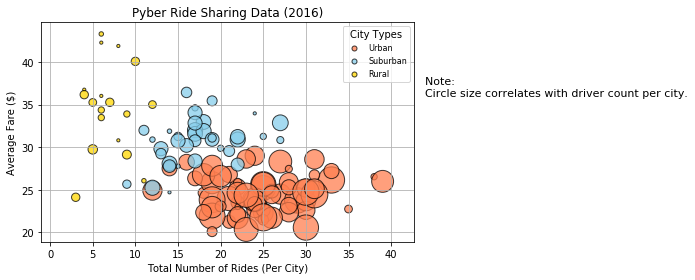

In [205]:
# Build the scatter plots for each city types
urban_plot = plt.scatter(x_urban_df, y_urban_df, s=b_urban_df * 10, c="coral", linewidths=1, 
                         edgecolors="black", alpha=0.75, label = "Urban", marker="o")
suburban_plot = plt.scatter(x_suburban_df, y_suburban_df, s=b_suburban_df * 10, c="skyblue", linewidths=1, 
                            edgecolors="black", alpha=0.75, label = "Suburban", marker="o")
rural_plot = plt.scatter(x_rural_df, y_rural_df, s=b_rural_df * 10, c="gold", linewidths=1, 
                         edgecolors="black", alpha=0.75, label = "Rural", marker="o")

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.tight_layout()
plt.axis("equal")

# Create a legend
## Note: I was stuck here about legend bubble sizing and referenced an thread on stack overflow to get this solution
## https://stackoverflow.com/questions/24706125/setting-a-fixed-size-for-points-in-legend
lgnd = plt.legend(title = "City Types", loc="best", scatterpoints=1, fontsize=8)
for handle in lgnd.legendHandles:
    handle.set_sizes([25.0])

# Incorporate a text label regarding circle size
plt.text(44,36, "Note: \nCircle size correlates with driver count per city.", fontsize=11)

# Save Figure
plt.savefig("Pyber Ride Sharing Data_2016.jpeg")

# Show plot
plt.show()

## Total Fares by City Type

In [206]:
# Calculate Type Percents
city_groups = combined_data_df.groupby('type')
total_fares = city_groups['fare'].sum()
total_fares.head()


type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

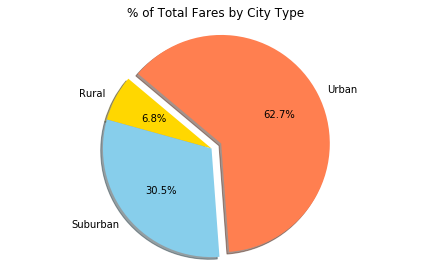

In [207]:
# Build Pie Chart
## labels of the city type
labels = ["Rural", "Suburban", "Urban"]

## colors of each type in the pie chart
colors = ["gold", "skyblue", "coral"]

# explode to seperate "Urban"
explode = (0, 0, 0.1)

# build the chart
plt.pie(total_fares, labels=labels, colors=colors, explode=explode, 
        autopct="%1.1f%%", shadow=True, startangle=140)

# Incorporate the other graph properties
plt.title("% of Total Fares by City Type")
plt.tight_layout()
plt.axis("equal")

# Save Figure
plt.savefig("Pct Total Fares by City Type.jpeg")

# Show Figure
plt.show()


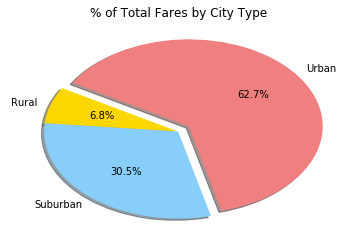

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

In [208]:
# Calculate Ride Percents
total_rides = city_groups['ride_id'].count()
total_rides.head()

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

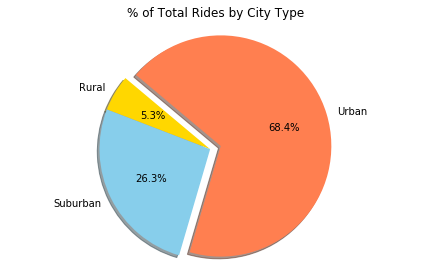

In [209]:
# Build Pie Chart
## labels of the city type
labels = ["Rural", "Suburban", "Urban"]

## colors of each type in the pie chart
colors = ["gold", "skyblue", "coral"]

# explode to seperate "Urban"
explode = (0, 0, 0.1)

# build the chart
plt.pie(total_rides, labels=labels, colors=colors, explode=explode, 
        autopct="%1.1f%%", shadow=True, startangle=140)

# Incorporate the other graph properties
plt.title("% of Total Rides by City Type")
plt.tight_layout()
plt.axis("equal")

# Save Figure
plt.savefig("Pct Total Rides by City Type.jpeg")

# Show Figure
plt.show()


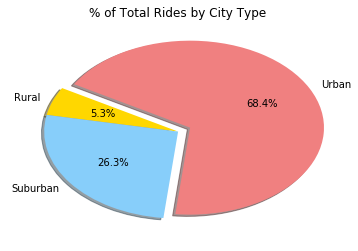

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

In [210]:
# Calculate Driver Percents
city_drivers = city_data_df.groupby('type')
total_drivers = city_drivers['driver_count'].sum()
total_drivers.head()

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

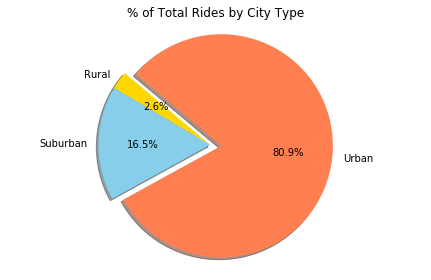

In [211]:
# Build Pie Chart
## labels of the city type
labels = ["Rural", "Suburban", "Urban"]

## colors of each type in the pie chart
colors = ["gold", "skyblue", "coral"]

# explode to seperate "Urban"
explode = (0, 0, 0.1)

# build the chart
plt.pie(total_drivers, labels=labels, colors=colors, explode=explode, 
        autopct="%1.1f%%", shadow=True, startangle=140)

# Incorporate the other graph properties
plt.title("% of Total Rides by City Type")
plt.tight_layout()
plt.axis("equal")

# Save Figure
plt.savefig("Pct Total Drivers by City Type.jpeg")

# Show Figure
plt.show()

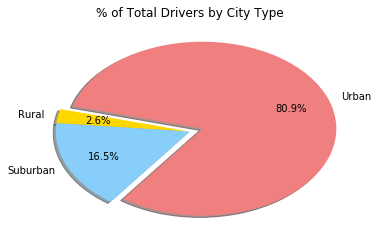

In [6]:
# Show Figure
plt.show()